# Bigmart Outlet Sales Prediction

## =================== Libraries used =====================

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings      # Ignores any warning
warnings.filterwarnings("ignore")

## ============== Data cleaning and prepration =============== 

In [2]:
# importing data

train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
testsales = pd.read_csv("Submission.csv")

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


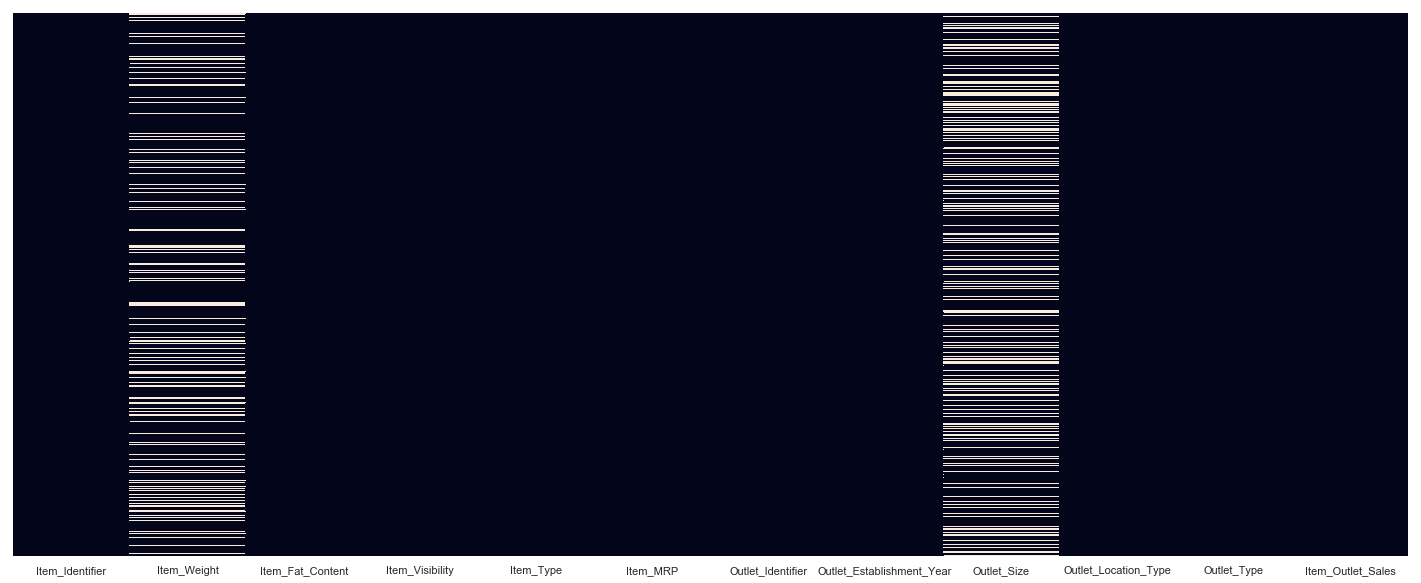

In [5]:
#examining null values

sns.set(rc={'figure.figsize':(25,10)})
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [7]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [9]:
#filling null values with mean/mode/median

train.Item_Weight = train.Item_Weight.fillna(train.Item_Weight.mean())
train.Outlet_Size = train.Outlet_Size.fillna(train.Outlet_Size.mode().iloc[0])

test.Item_Weight = test.Item_Weight.fillna(test.Item_Weight.mean())
test.Outlet_Size = test.Outlet_Size.fillna(test.Outlet_Size.mode().iloc[0])

In [10]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [11]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [12]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [13]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.245189,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,9.195000,0.027047,94.412000,1987.000000
50%,12.695633,0.054154,141.415400,1999.000000
75%,15.850000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [76]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Item_Category                 object
dtype: object

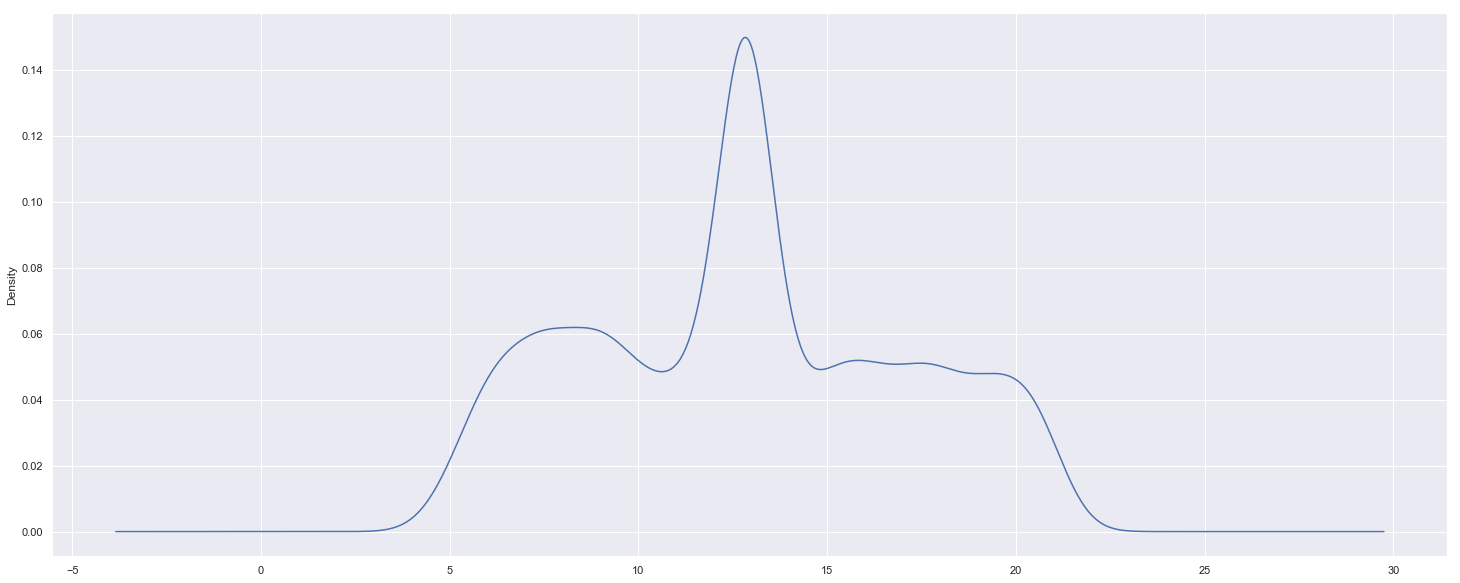

In [14]:
train.Item_Weight.plot.density()

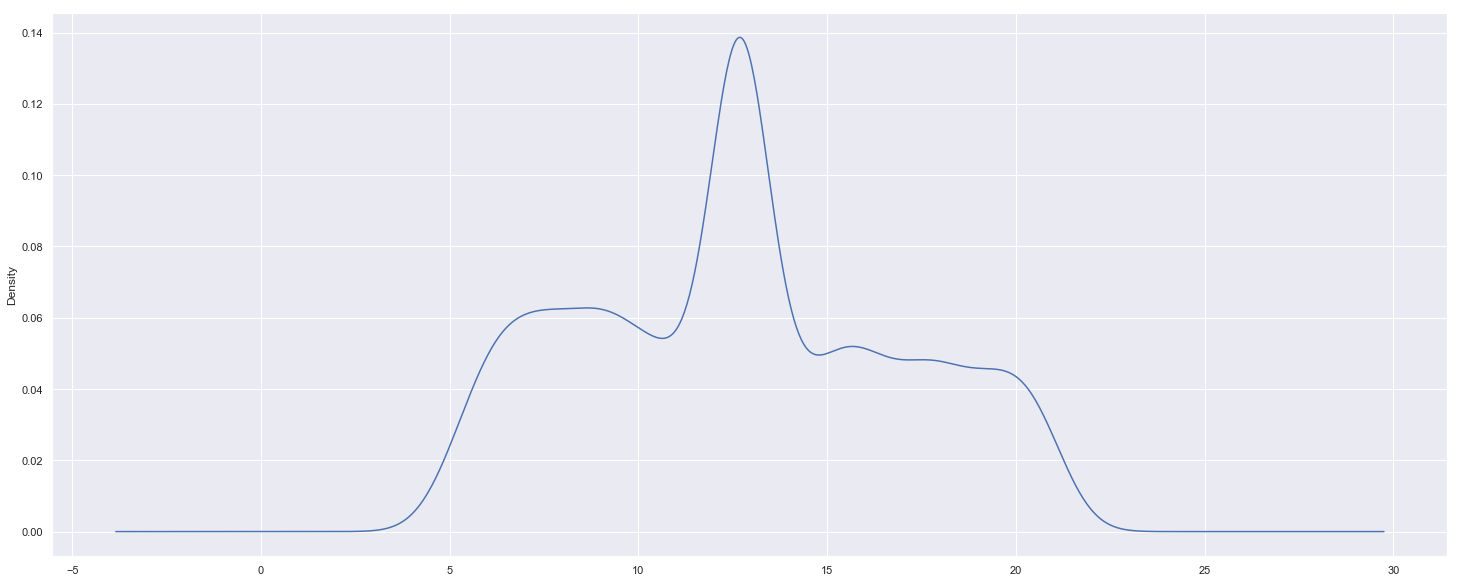

In [15]:
test.Item_Weight.plot.density()

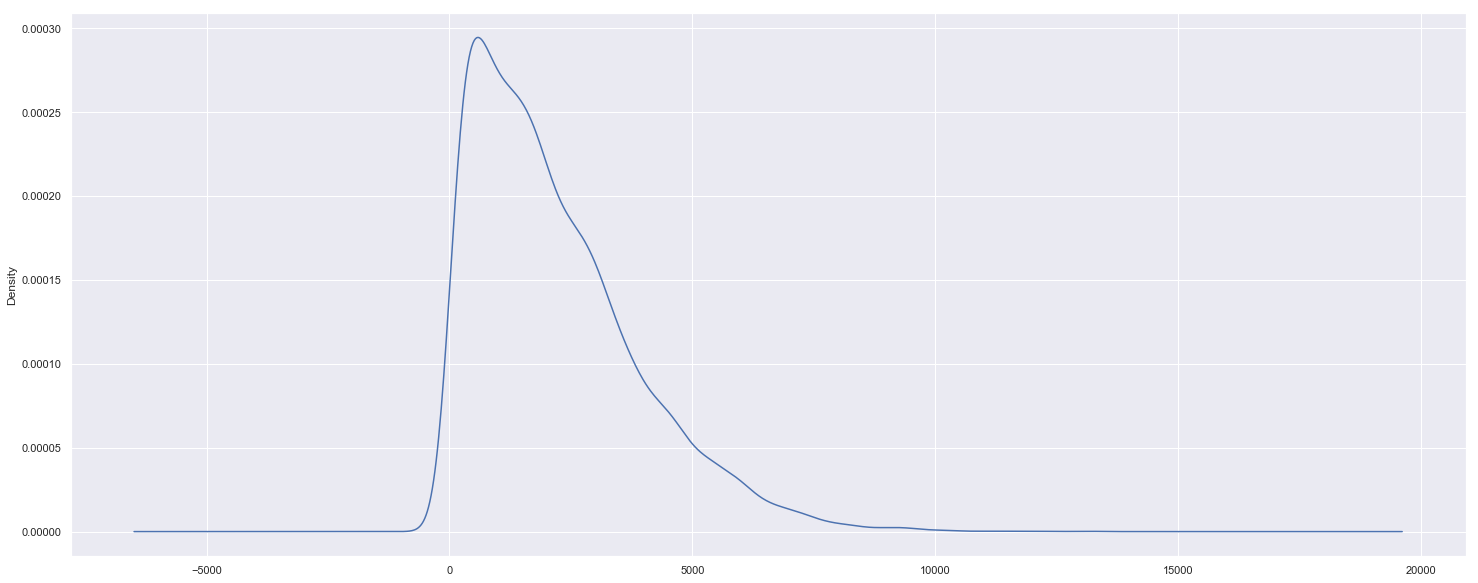

In [16]:
train.Item_Outlet_Sales.plot.density()

In [17]:
train.Item_Type.value_counts()


Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [18]:
train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [19]:
test.Item_Fat_Content.value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

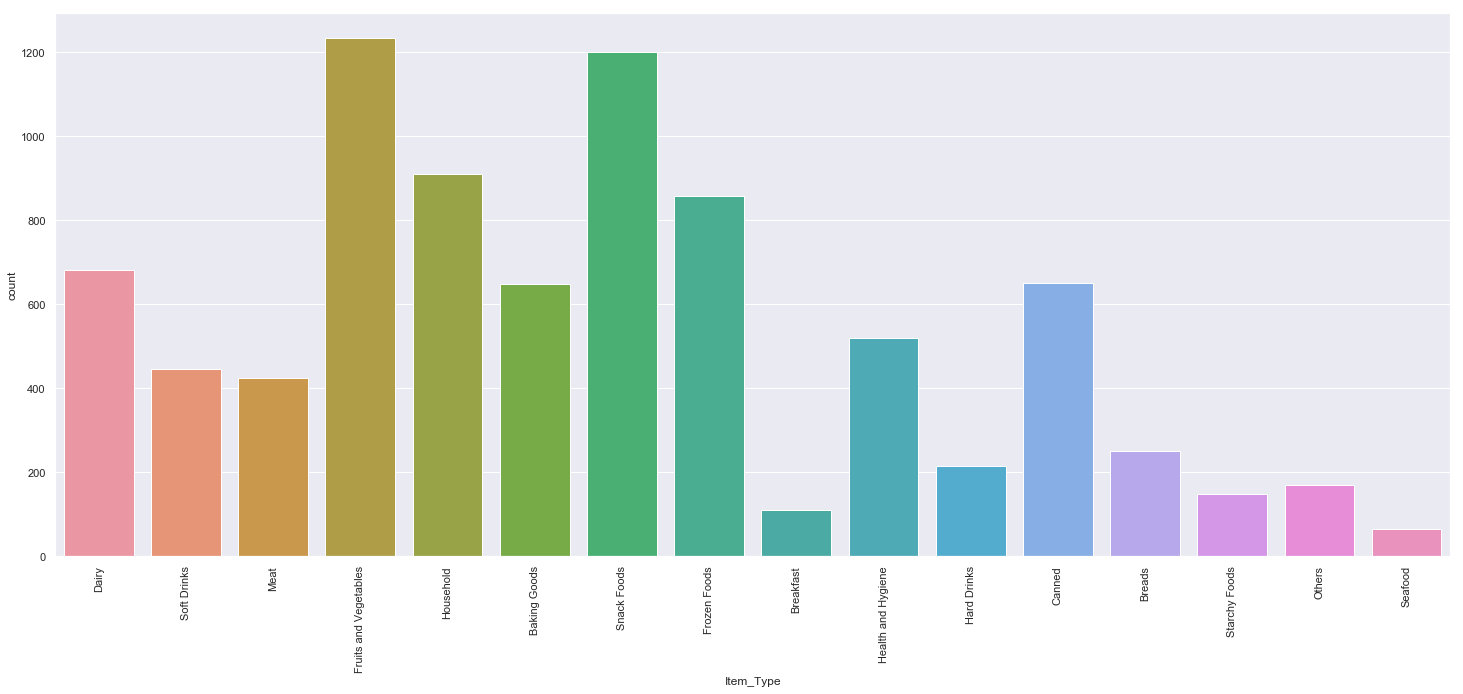

In [20]:

#Distribution of the variable Item_Type
sns.countplot(train.Item_Type)
plt.xticks(rotation=90)


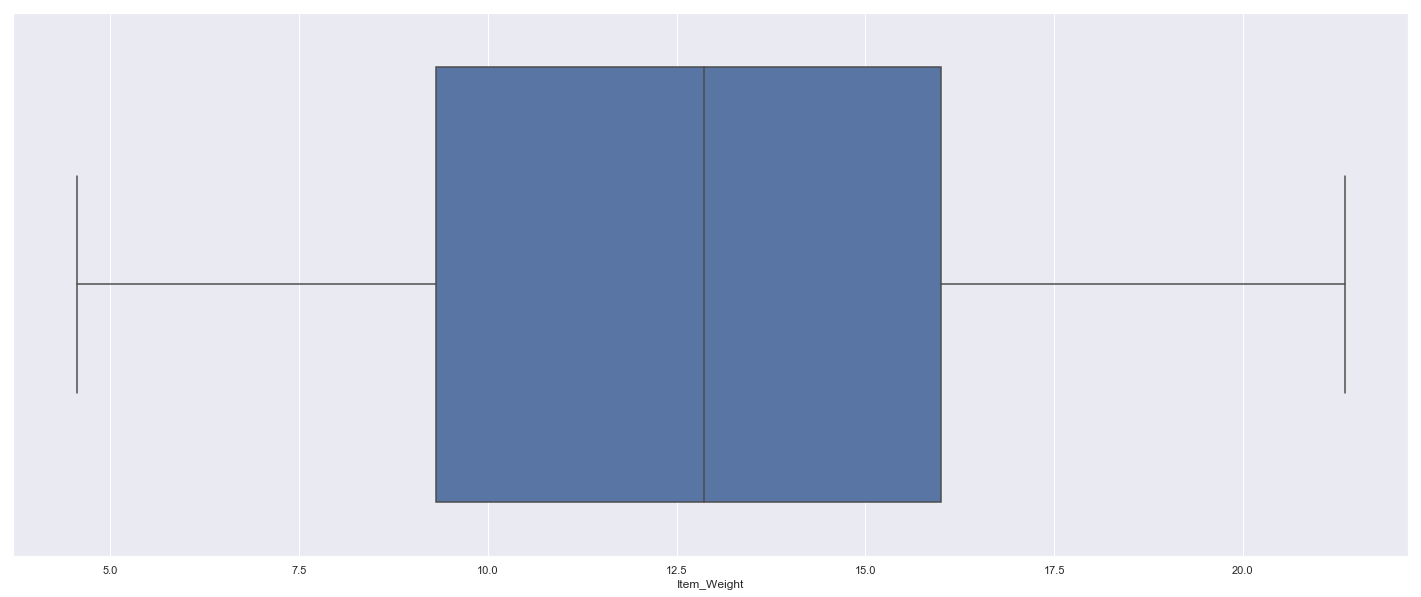

In [21]:
# finding outliers in data  Item_Weight 
sns.boxplot(train['Item_Weight'])





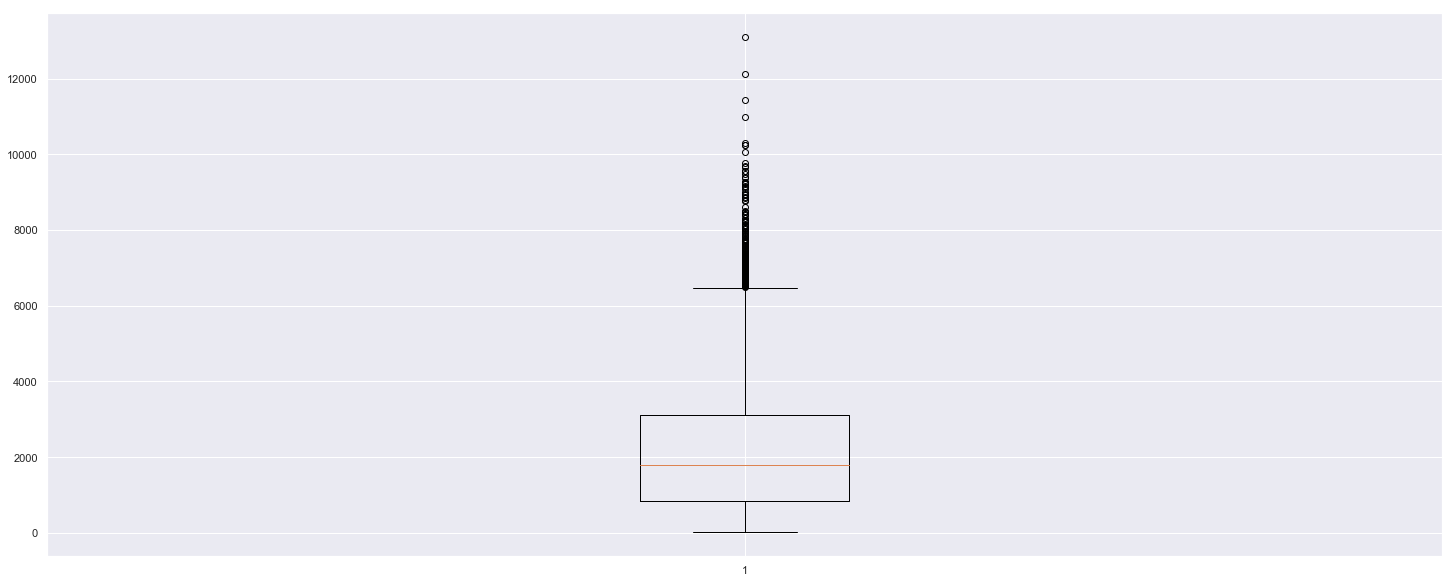

In [22]:
#finding outliers in Item_Outlet_Sales
plt.boxplot(train["Item_Outlet_Sales"])
d=plt.show()

In [23]:
#removing tht outliers
d=train[train.Item_Outlet_Sales<6000]
d

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350


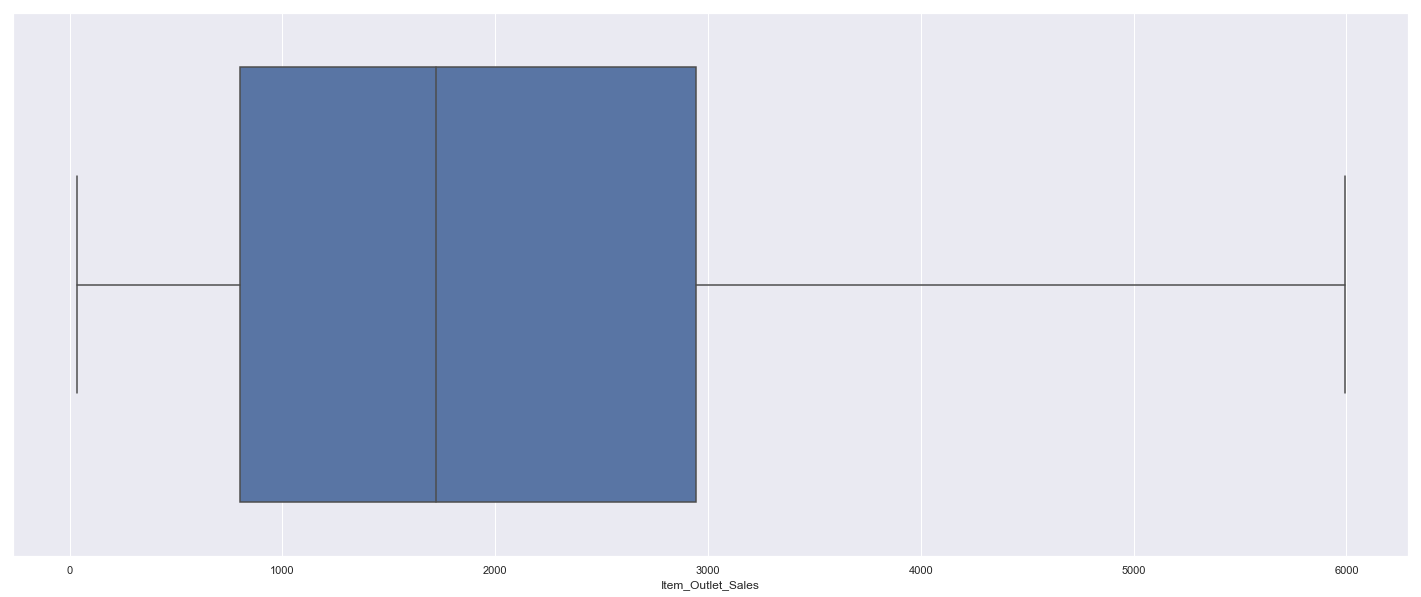

In [24]:
# finding any outliers in Item_Outlet_Sales
sns.boxplot(d["Item_Outlet_Sales"])


In [25]:
train.Item_Fat_Content = train.Item_Fat_Content.str.replace('low fat', 'Low Fat')
train.Item_Fat_Content = train.Item_Fat_Content.str.replace('LF', 'Low Fat')
train.Item_Fat_Content = train.Item_Fat_Content.str.replace('reg', 'Regular')

test.Item_Fat_Content = test.Item_Fat_Content.str.replace('low fat', 'Low Fat')
test.Item_Fat_Content = test.Item_Fat_Content.str.replace('LF', 'Low Fat')
test.Item_Fat_Content = test.Item_Fat_Content.str.replace('reg', 'Regular')

## ============= Exploratory data analysis ==============

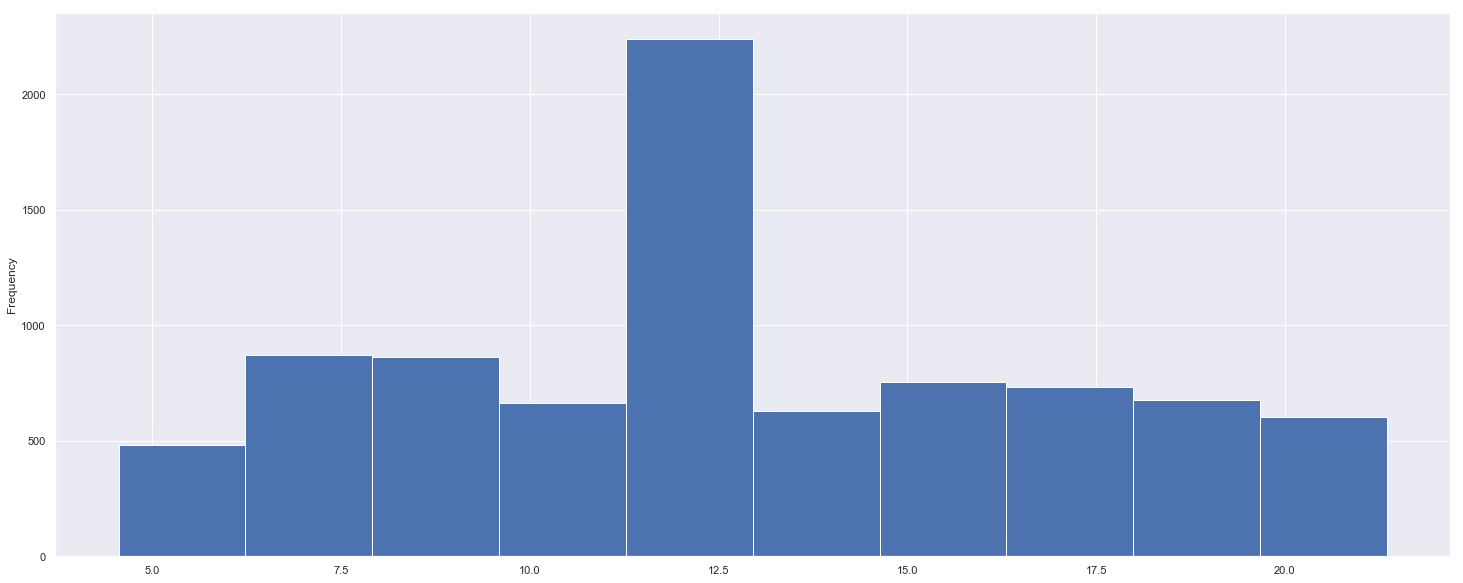

In [26]:
train.Item_Weight.plot(kind='hist')

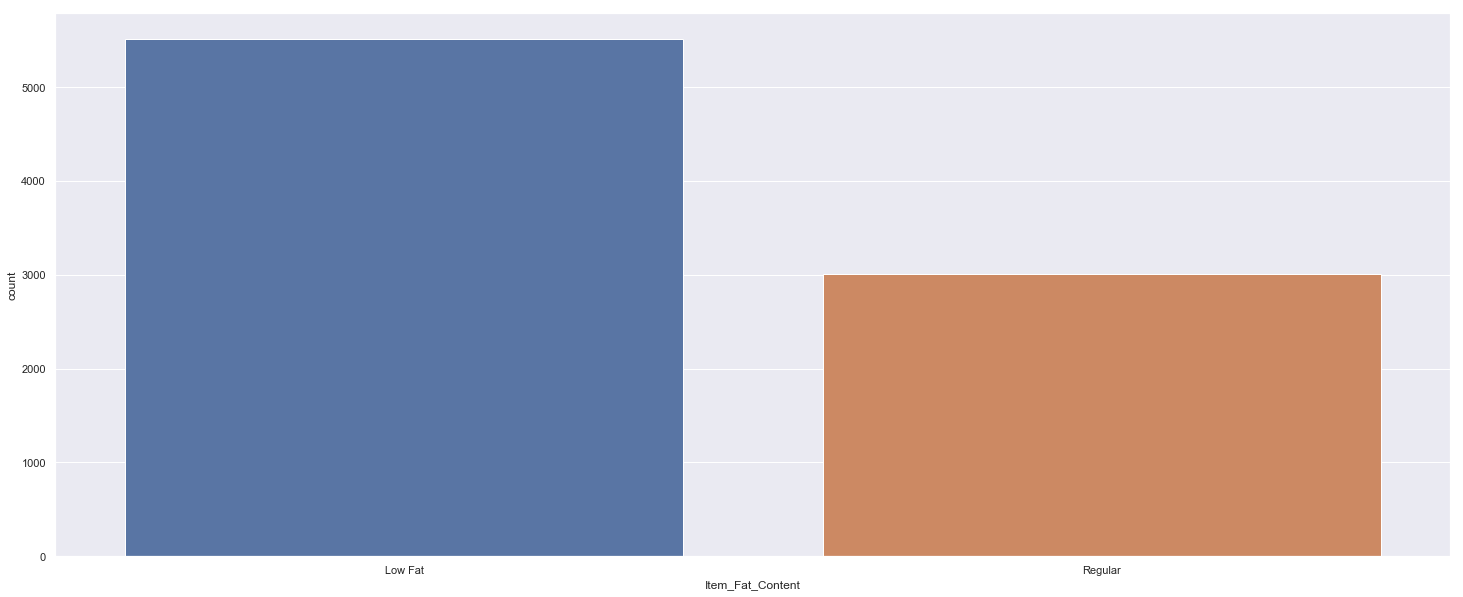

In [28]:
sns.countplot(x='Item_Fat_Content',data=train)

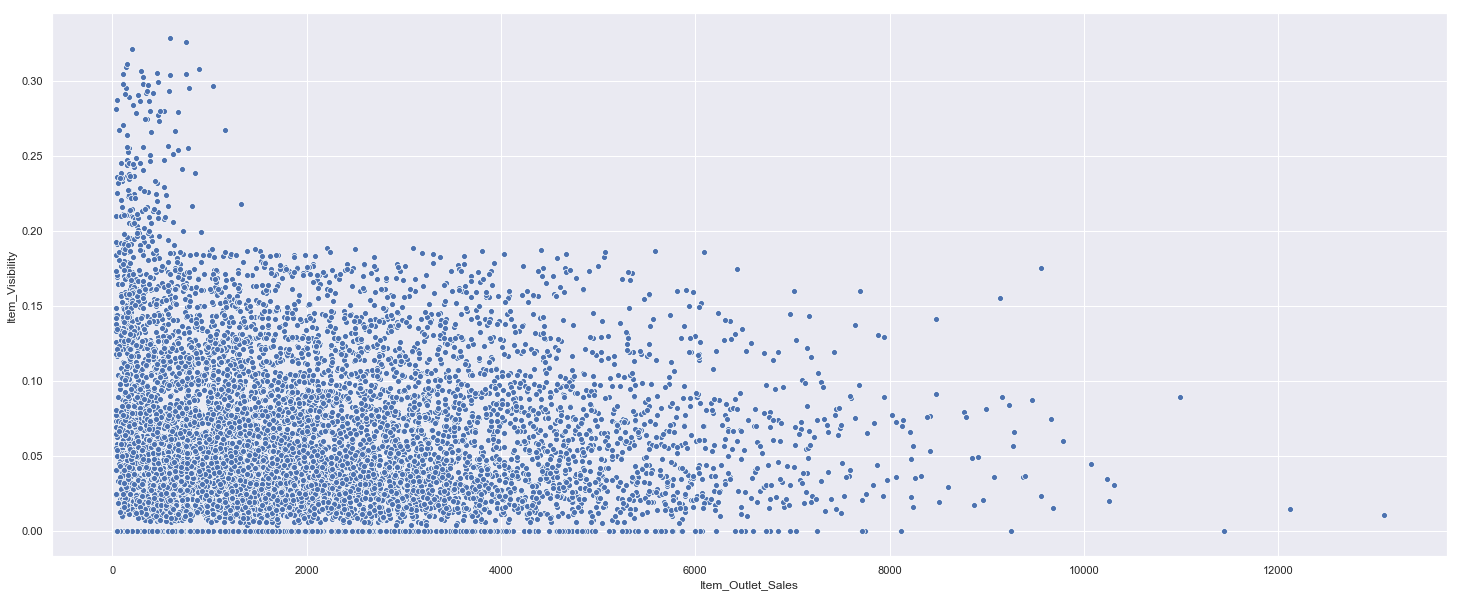

In [29]:
sns.scatterplot(x="Item_Outlet_Sales",y="Item_Visibility",data=train)

In [31]:
#feature extraction

def create_Category(data):
    if str(data['Item_Identifier']).startswith('NC'):
        return 'Non Consumable'
    elif str(data['Item_Identifier']).startswith('FD'):
        return 'Food'
    else:
        return 'Drinks'

train['Item_Category']= train.apply(create_Category,axis=1)
test['Item_Category']= test.apply(create_Category,axis=1)

train['Item_Category'].value_counts()

Food              6125
Non Consumable    1599
Drinks             799
Name: Item_Category, dtype: int64

In [32]:
#fat column correction

def FatCorrection(train):
    if train.Item_Category == "Non Consumable":
        return "No Fat"
    else:
        return train.Item_Fat_Content
    
train['Item_Fat_Content']= train.apply(FatCorrection,axis=1)
test['Item_Fat_Content']= test.apply(FatCorrection,axis=1)

train['Item_Fat_Content'].value_counts()

Low Fat    3918
Regular    3006
No Fat     1599
Name: Item_Fat_Content, dtype: int64

In [33]:
train.Outlet_Establishment_Year.value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [34]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.93,No Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non Consumable


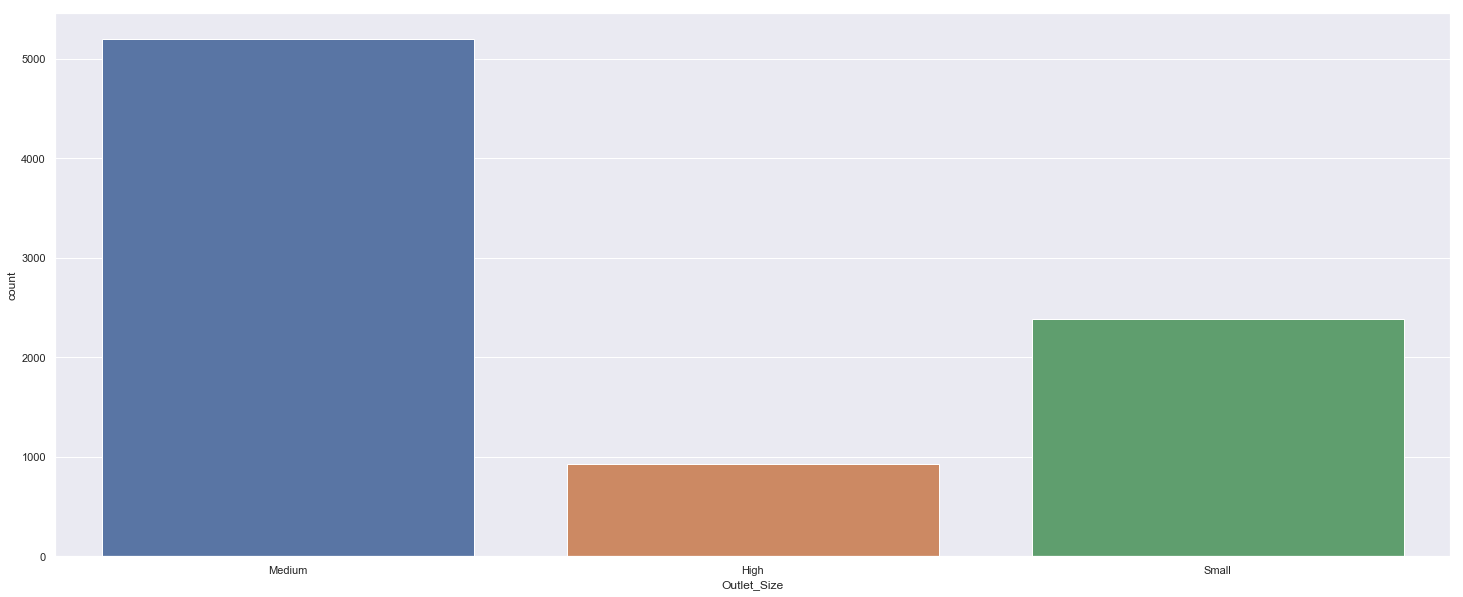

In [35]:
# how the outlet size reltes to out target variable
sns.countplot(train.Outlet_Size)

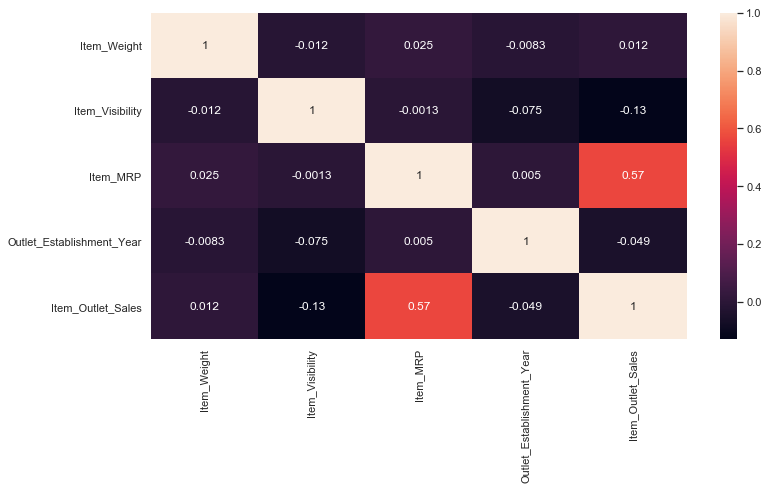

In [36]:
#From the current numeric variables we see that the Item_Visibility is the feature with the lowest correlation with our target variable.
#Therefore, the less visible the product is in the store the higher the price will be. 
#Furthermore, the most positive correlation belongs to Item_MRP . 

#finding correlation


plt.figure(figsize=(12,6))
sns.heatmap(train.corr(),annot=True)

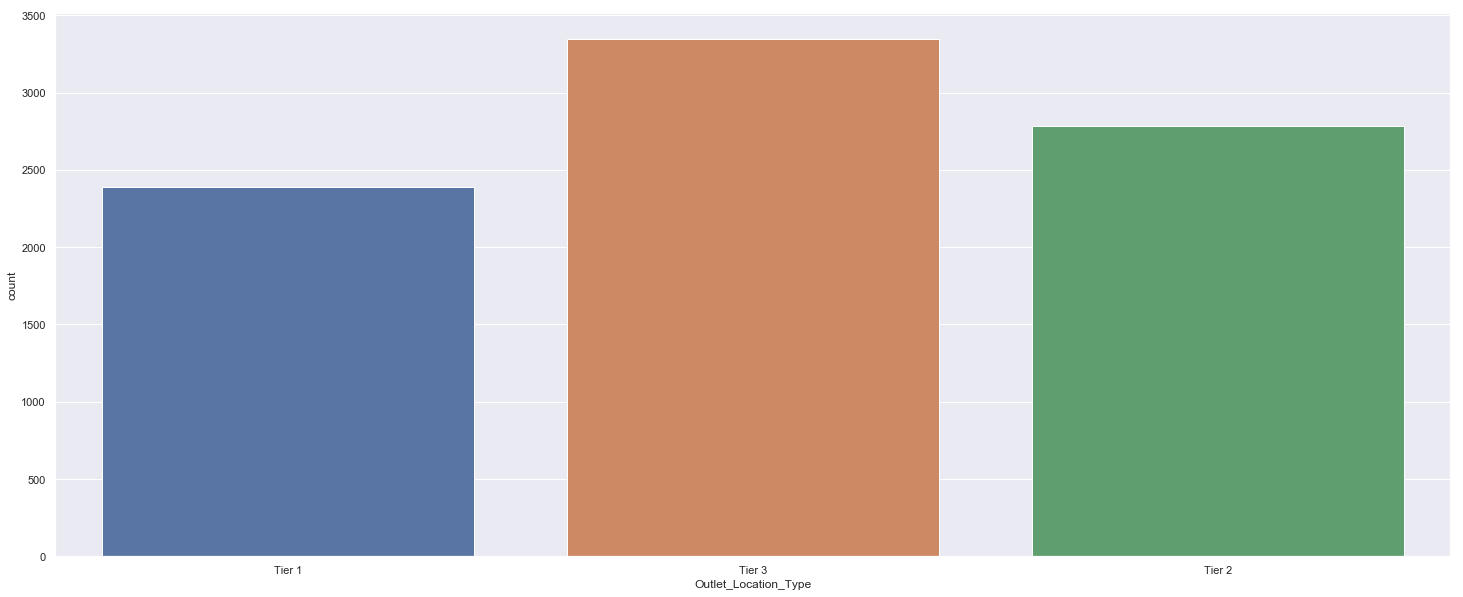

In [37]:
#Distribution of the variable Outlet_Location_Type
sns.countplot(train.Outlet_Location_Type)

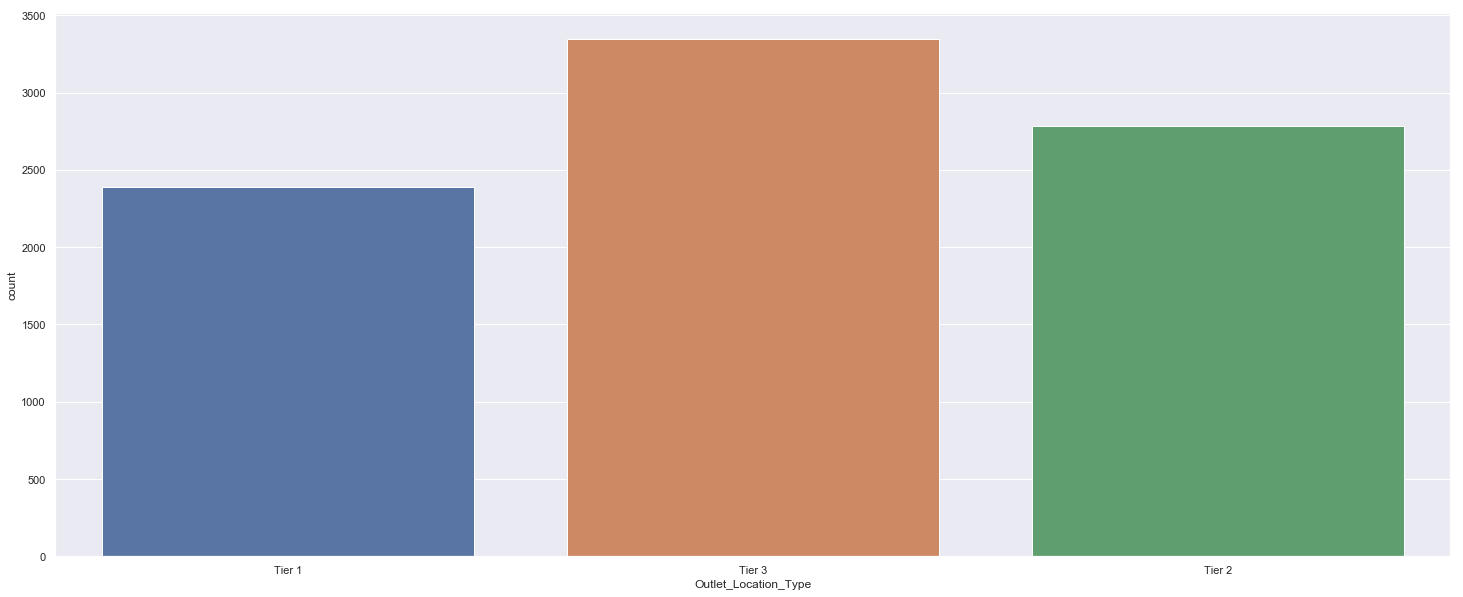

In [38]:
#Distribution of the variable Outlet_Location_Type
sns.countplot(train.Outlet_Location_Type)

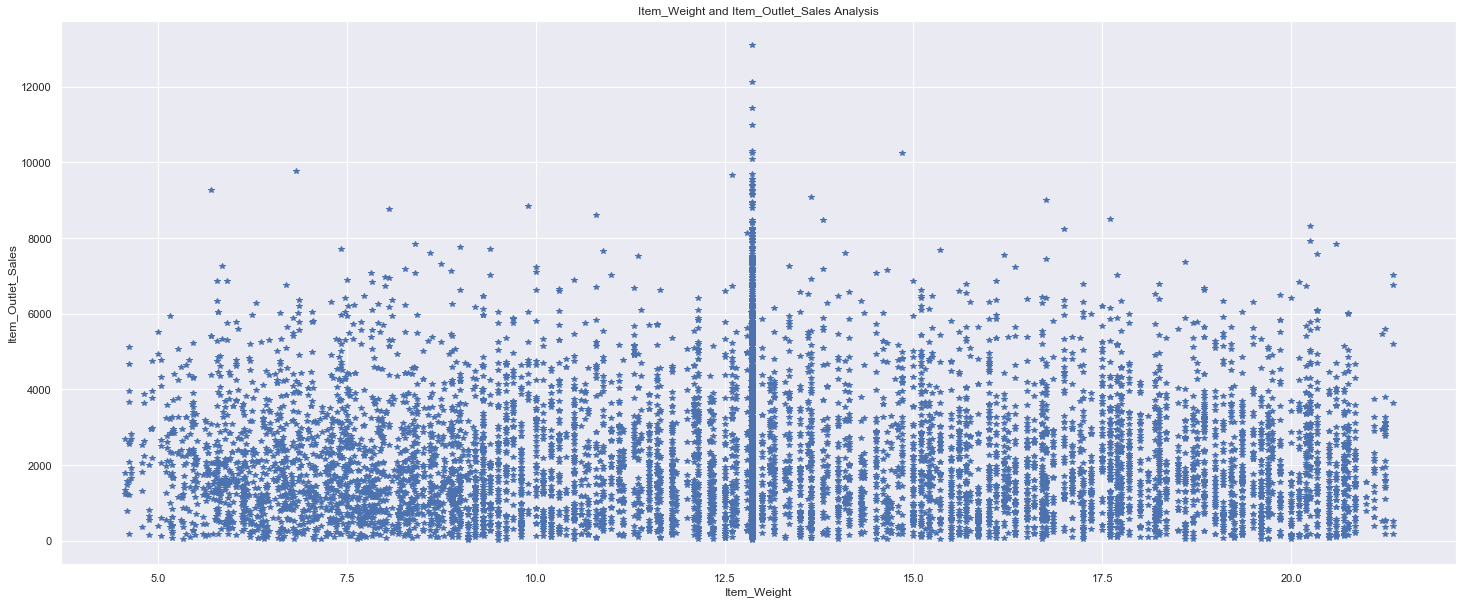

In [39]:
# relation between Item_Weight and Item_Outlet_Sale
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")
plt.plot(train.Item_Weight, train["Item_Outlet_Sales"],'*', )

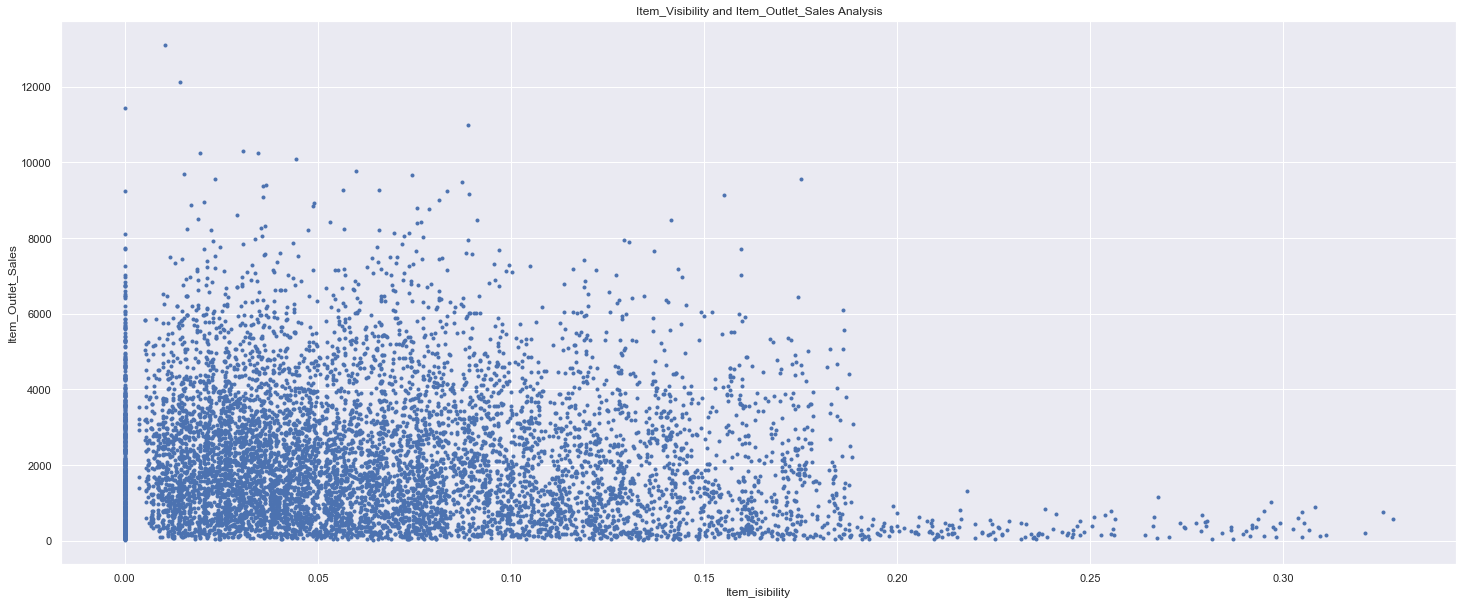

In [40]:
#Item_Visibility and Item_Outlet_Sales
#The location of product in a store will impact sales.
#Ones which are right at entrance will catch the eye of customer first rather than the ones in back.
#the more visible a product is the less higher its sales will be

plt.xlabel("Item_isibility")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Visibility and Item_Outlet_Sales Analysis")
plt.plot(train.Item_Visibility, train["Item_Outlet_Sales"],'.')

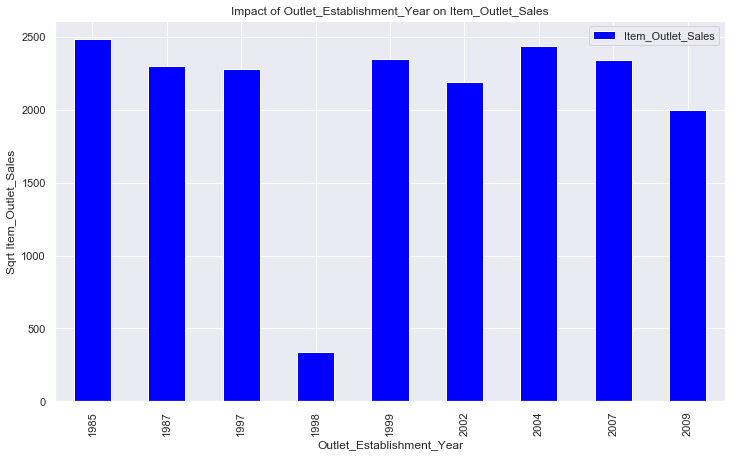

In [41]:
#Outlet_Establishment_Year and Item_Outlet_Sales 
Outlet_Establishment_Year_pivot = \
train.pivot_table(index='Outlet_Establishment_Year', values="Item_Outlet_Sales")
Outlet_Establishment_Year_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Sqrt Item_Outlet_Sales")
plt.title("Impact of Outlet_Establishment_Year on Item_Outlet_Sales")

plt.show()

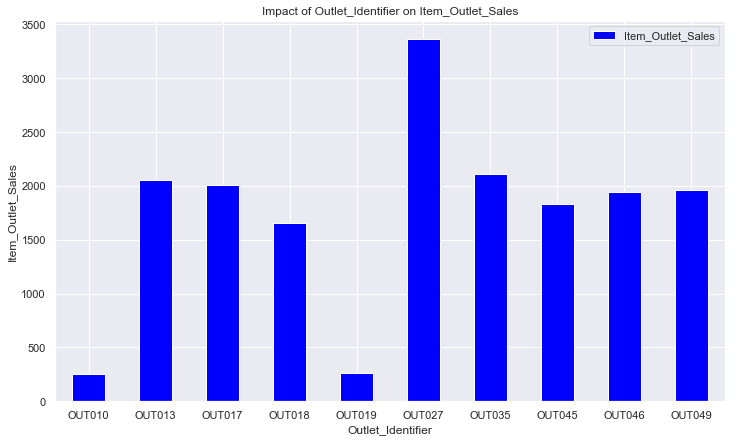

In [42]:
# Impact of Outlet_Identifier on Item_Outlet_Sales
Outlet_Identifier_pivot = \
train.pivot_table(index='Outlet_Identifier', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Identifier_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Identifier")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Identifier on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [43]:
train.pivot_table(values='Outlet_Type', columns='Outlet_Identifier',aggfunc=lambda x:x.mode())

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type1,Supermarket Type2,Grocery Store,Supermarket Type3,Supermarket Type1,Supermarket Type1,Supermarket Type1,Supermarket Type1


In [44]:
train.pivot_table(values='Outlet_Type', columns='Outlet_Size',aggfunc=lambda x:x.mode())

Outlet_Size,High,Medium,Small
Outlet_Type,Supermarket Type1,Supermarket Type1,Supermarket Type1


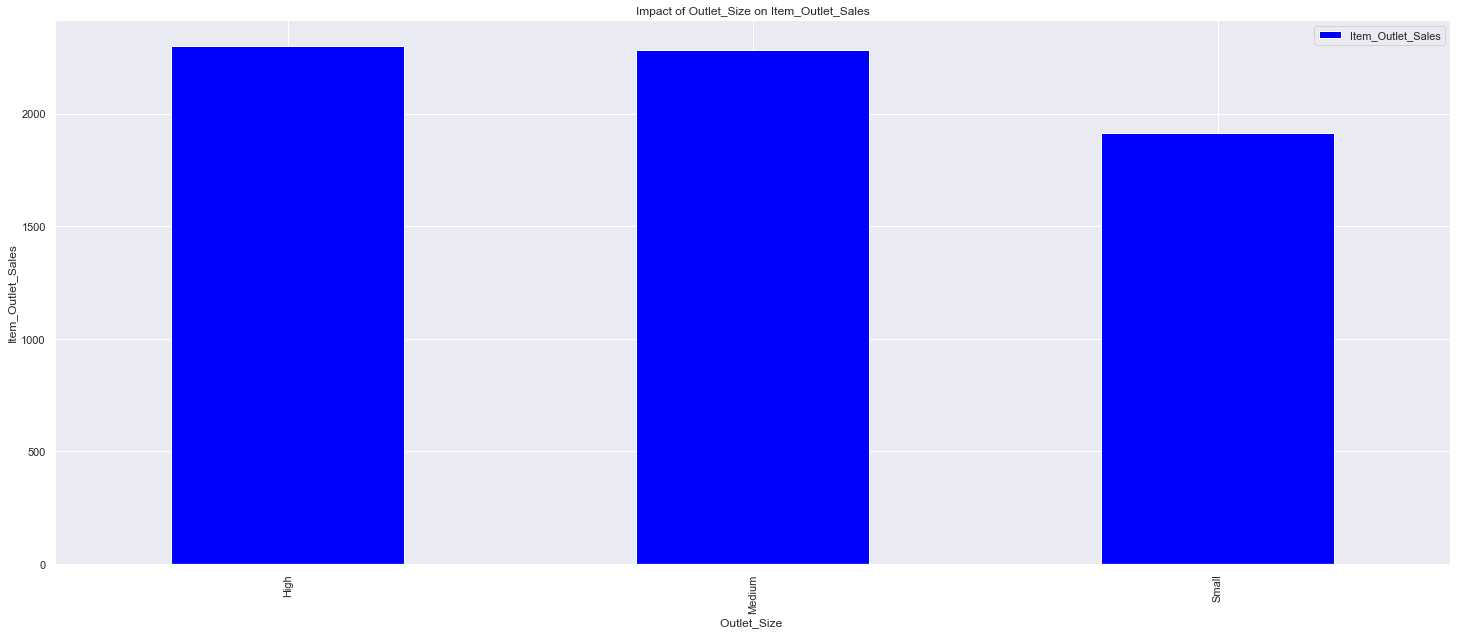

In [45]:
#Impact of Outlet_Size on Item_Outlet_Sales
Outlet_Size_pivot = \
train.pivot_table(index='Outlet_Size', values="Item_Outlet_Sales")
Outlet_Size_pivot.plot(kind='bar', color='blue')
plt.xlabel("Outlet_Size ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Size on Item_Outlet_Sales")
plt.show()

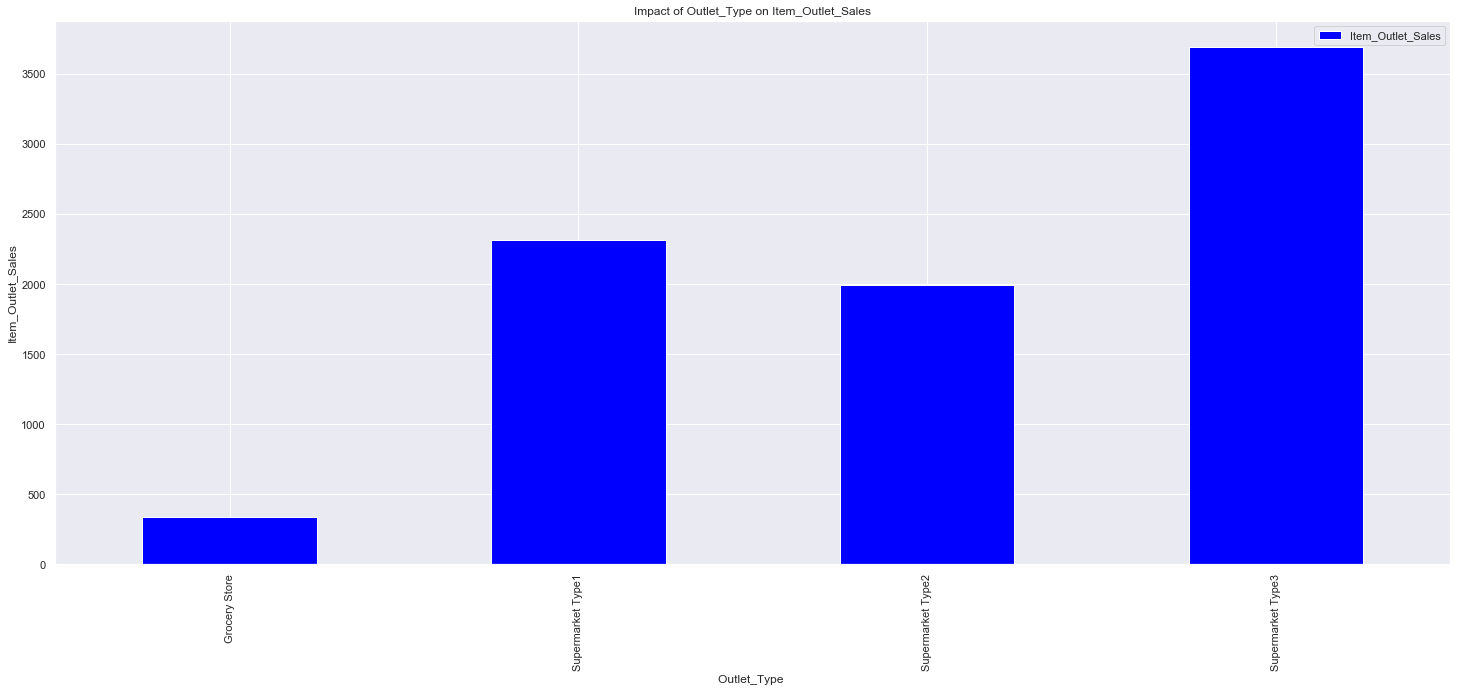

In [46]:
#Impact of Outlet_Type on Item_Outlet_Sales
Outlet_Type_pivot = \
train.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales")
Outlet_Type_pivot.plot(kind='bar', color='blue')
plt.xlabel("Outlet_Type ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Type on Item_Outlet_Sales")
plt.show()

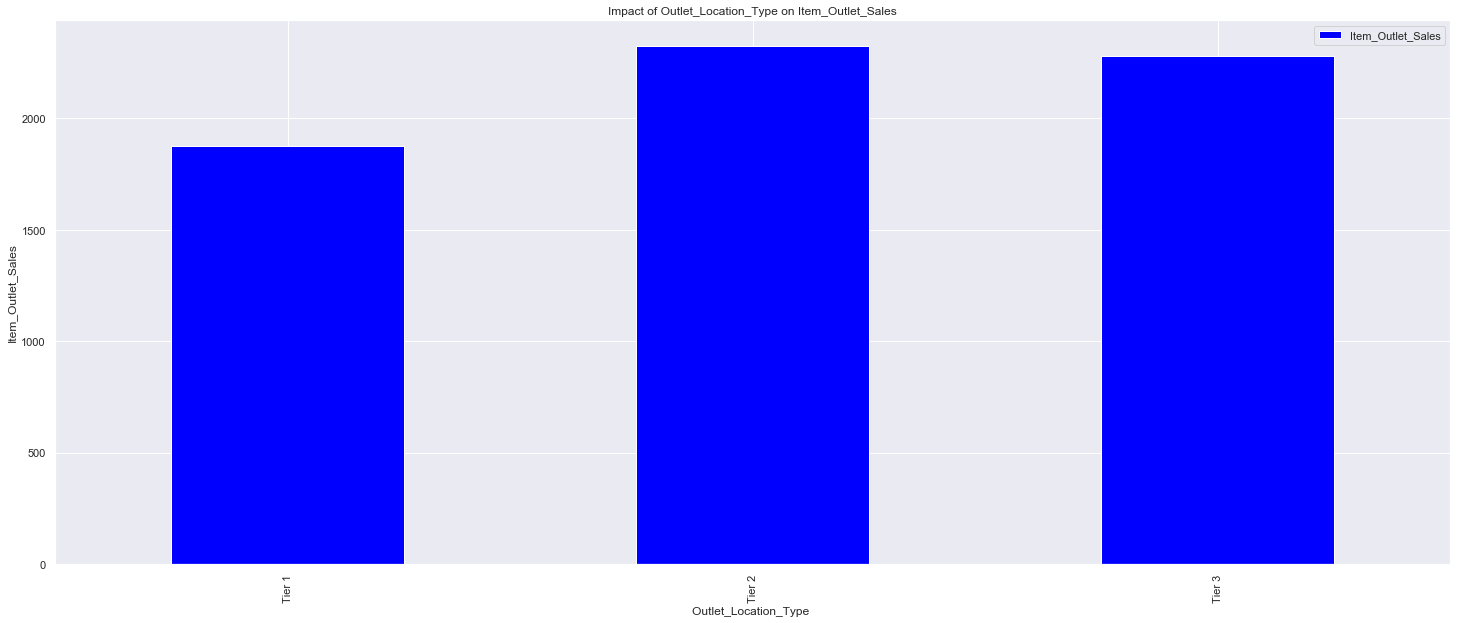

In [47]:
 #Impact of Outlet_Location_Type on Item_Outlet_Sales
Outlet_Location_Type_pivot = \
train.pivot_table(index='Outlet_Location_Type', values="Item_Outlet_Sales")
Outlet_Location_Type_pivot.plot(kind='bar', color='blue')
plt.xlabel("Outlet_Location_Type ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Location_Type on Item_Outlet_Sales")
plt.show()



In [48]:
train.pivot_table(values='Outlet_Location_Type', columns='Outlet_Type',aggfunc=lambda x:x.mode())

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Location_Type,Tier 3,Tier 2,Tier 3,Tier 3


In [49]:
train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.930000,No Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non Consumable
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,Food
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,Food
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,Food
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986,Food
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350,Food


In [50]:
train.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [51]:
test.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Category
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,Food
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,Food
2,NCN55,14.600000,No Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,Non Consumable
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,Food
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,Food
5,FDH56,9.800000,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1,Food
6,FDL48,19.350000,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2,Food
7,FDC48,12.695633,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3,Food
8,FDN33,6.305000,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,Medium,Tier 2,Supermarket Type1,Food
9,FDA36,5.985000,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,Medium,Tier 2,Supermarket Type1,Food


In [52]:
testsales.head()

,Unnamed: 0,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,0,FDW58,OUT049,1636.244023
1,1,FDW14,OUT017,1409.355910
2,2,NCN55,OUT010,710.594286
3,3,FDQ58,OUT017,2355.184955
4,4,FDY38,OUT027,5857.916205


In [53]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 12 columns):
Item_Identifier              5681 non-null object
Item_Weight                  5681 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  5681 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
Item_Category                5681 non-null object
dtypes: float64(3), int64(1), object(8)
memory usage: 532.7+ KB


In [54]:
testsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 4 columns):
Unnamed: 0           5681 non-null int64
Item_Identifier      5681 non-null object
Outlet_Identifier    5681 non-null object
Item_Outlet_Sales    5681 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 177.6+ KB


### As it seems there is no strong correlation visible in the data so we can not judge which features are important and which are not. So we need to consider almost all the features, that are given in the dataset, in our model

## =============== DATA PREPROCESSING ==============

In [55]:
#selecting training data

x_train = train.iloc[:,[1,2,3,4,5,7,8,9,10,12]].values
y_train = train.iloc[:,-2].values

In [56]:
#selecting testing data

x_test = test.iloc[:,[1,2,3,4,5,7,8,9,10,11]].values
y_test = testsales.iloc[:,-1].values

In [57]:
labelencoder_x = LabelEncoder()

In [58]:
# encoding categorical variables so that they can become useful for the machine learning models

x_train[:,1] = labelencoder_x.fit_transform(x_train[:,1])
x_test[:,1] = labelencoder_x.fit_transform(x_test[:,1])

x_train[:,3] = labelencoder_x.fit_transform(x_train[:,3])
x_test[:,3] = labelencoder_x.fit_transform(x_test[:,3])

x_train[:,6] = labelencoder_x.fit_transform(x_train[:,6])
x_test[:,6] = labelencoder_x.fit_transform(x_test[:,6])

x_train[:,7] = labelencoder_x.fit_transform(x_train[:,7])
x_test[:,7] = labelencoder_x.fit_transform(x_test[:,7])

x_train[:,8] = labelencoder_x.fit_transform(x_train[:,8])
x_test[:,8] = labelencoder_x.fit_transform(x_test[:,8])

x_train[:,9] = labelencoder_x.fit_transform(x_train[:,9])
x_test[:,9] = labelencoder_x.fit_transform(x_test[:,9])

In [59]:
# creating dummy variables. 

onehotencoder = OneHotEncoder(categorical_features = [3])
x_train = onehotencoder.fit_transform(x_train).toarray()
x_train = x_train[:,1:]
x_test = onehotencoder.fit_transform(x_test).toarray()
x_test = x_test[:,1:]

onehotencoder = OneHotEncoder(categorical_features = [-3])
x_train = onehotencoder.fit_transform(x_train).toarray()
x_train = x_train[:,1:]
x_test = onehotencoder.fit_transform(x_test).toarray()
x_test = x_test[:,1:]

onehotencoder = OneHotEncoder(categorical_features = [-2])
x_train = onehotencoder.fit_transform(x_train).toarray()
x_train = x_train[:,1:]
x_test = onehotencoder.fit_transform(x_test).toarray()
x_test = x_test[:,1:]

onehotencoder = OneHotEncoder(categorical_features = [-1])
x_train = onehotencoder.fit_transform(x_train).toarray()
x_train = x_train[:,1:]
x_test = onehotencoder.fit_transform(x_test).toarray()
x_test = x_test[:,1:]

# ============== Regression Model Building ==============

## MultipleLinearRegression

In [60]:
regressor = LinearRegression()

In [61]:
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [62]:
y_pred = regressor.predict(x_test)

In [63]:
r2_score(y_pred, y_test)

0.9292380189924268

In [64]:
regressor.score(x_test,y_test)

0.9310305929599839

In [65]:
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

213.30675731943282
115052.9955874024
339.194627887003


## DecisionTreeRegression

In [66]:
regressor2 = DecisionTreeRegressor(random_state=0)

In [67]:
regressor2.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [68]:
y_pred2 = regressor2.predict(x_test)

In [69]:
r2_score(y_pred2, y_test)

0.586912854312547

In [70]:
print(mean_absolute_error(y_test, y_pred2))
print(mean_squared_error(y_test, y_pred2))
print(np.sqrt(mean_squared_error(y_test, y_pred2)))

806.2869417243049
1325918.2849698337
1151.4852517378733


## RandomForest

In [71]:
regressor3 = RandomForestRegressor(n_estimators=100)

In [72]:
regressor3.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [73]:
y_pred3 = regressor3.predict(x_test)

In [74]:
r2_score(y_pred3, y_test)

0.9034001763407998

In [75]:
print(mean_absolute_error(y_test, y_pred3))
print(mean_squared_error(y_test, y_pred3))
print(np.sqrt(mean_squared_error(y_test, y_pred3)))

298.2500908753734
190409.21184810344
436.35904006689657


#### Performance Comparision-

## Multiple Linear Regression = 92.9%
## Decision Tree =58.6
## Random Forest Regression = 90.5% 